# Read MNIST dataset

Dataset downloaded from *https://www.garrickorchard.com/datasets/n-mnist*

event-Python repo downloaded from github: *https://github.com/gorchard/event-Python*

In [1]:
import sys
from matplotlib import pyplot as plt
import numpy as np

sys.path.append('event-Python')

import eventvision

Event-based vision module imported


In [3]:
ev = eventvision.read_dataset(r'datasets\mnist\Test\0\00004.bin')

In [50]:
ev.show_td(100)

In [33]:
ev.data

rec.array([(18, 11, False,    581), (21, 13, False,   1703),
           (12, 24, False,   2625), ..., (21, 19,  True, 307025),
           (32, 10,  True, 307397), (10, 19,  True, 308529)],
          dtype=[('x', '<u2'), ('y', '<u2'), ('p', '?'), ('ts', '<u8')])

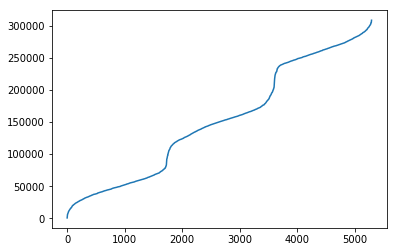

In [6]:
plt.plot([v.ts for v in ev.data])

In [40]:
# plt.plot([v.p * 1 for v in ev.data])
for i in range(100):
    print ev.data[i].p

False
False
False
False
True
False
True
True
False
False
True
False
True
False
False
False
False
False
False
True
False
True
False
True
False
False
False
False
True
True
False
False
False
False
False
False
True
False
False
False
False
False
True
True
False
False
False
False
True
True
False
False
True
False
False
True
True
False
False
True
False
False
False
False
True
False
False
True
False
True
False
False
True
True
True
True
True
False
False
True
True
True
True
False
False
False
True
False
True
True
True
False
True
False
False
True
False
False
False
False


In [42]:
len([1 for v in ev.data if not v.p])

2704

## Plot time context $\mathcal{T}_i(\mathbf{u},p)$ and time surface $\mathcal{S}_i(\mathbf{u},p)$

The time context is a 3D (2 spatial axes and 1 time) surface that indicates the most recent activations/events for each pixel at a given moment in time $i$ , within a small spatial region $\mathbf{u}$:

$$\mathcal{T}_i(\mathbf{u},p) = max_{j <= i}\{t_j | \mathbf{x}_j = (\mathbf{x}_i + \mathbf{u}), p_j = p\}$$

Note that we choose to either plot ON ($p_j = 1$) or OFF ($p_j = -1$) events, not both at the same time, just to aid visualisation.

This time-context operation is essentially a form of spatio-temporal max-pooling.


The time surface is the time context with an exponential decay applied:

$$\mathcal{S}_i(\mathbf{u},p) = e^{-(t_i - \mathcal{T}_i(\mathbf{u},p) )/\tau} $$


Text(0.5,1,'Time surface')

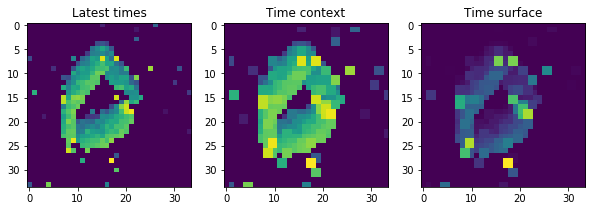

In [49]:
# plot time context

# set current time
i = 100000

im_latest_times = np.zeros((ev.height, ev.width))

for e in ev.data:
    if e.ts <= i:
        if e.p:
            im_latest_times[e.y, e.x] = e.ts
    else:
        break

# generate time context

R = 1
im_time_context = np.zeros((ev.height, ev.width))

for x in range(ev.width):
    for y in range(ev.height):
        if R <= x <= ev.width and R <= y <= ev.width:
            im_time_context[y, x] = np.max(im_latest_times[y-R:y+R, x-R:x+R])
            
# create time surface from time context

tau = 10000*2

im_time_surface = np.exp(-(i - im_time_context)/tau)
            
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(im_latest_times)
ax[1].imshow(im_time_context)
ax[2].imshow(im_time_surface)
ax[0].set_title('Latest times')
ax[1].set_title('Time context')
ax[2].set_title('Time surface')